# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [213]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to supress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [129]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data frame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:   There are integers, floats, and strings.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [116]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
rating_copy              0
dtype: int64

In [130]:
#There are missing ratings that are listed as "Not given" (from question 5).  Remove the string so the column may be treated as a number.
#First create a copy of the dataframe
DF=df.copy()
#replace the Not given with Numpy not a number
df.loc[df["rating"]=="Not given","rating"]=np.NaN
#convert the column to float data type so it may be treated as a number.
df=df.astype({'rating':'float'})
#confirm the data type
df.rating.dtypes

dtype('float64')

#### Observations:  There are no empty values in the data set. There were 736 orders that were not rated.
Exploratory Data Analysis (EDA)


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [131]:
#Transposed the data to make it easier to read
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:  The min food preparation time is 20 minutes, mean is 27 minutes, and max is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [133]:
#Break down the ratings entries and count the values from the unaltered copied dataframe.
DF['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:  There are 736 orders that were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: >

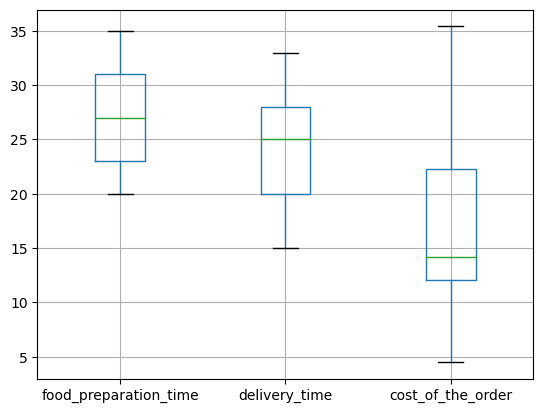

In [80]:
df[["food_preparation_time", "delivery_time", "cost_of_the_order"]].boxplot()

<Axes: >

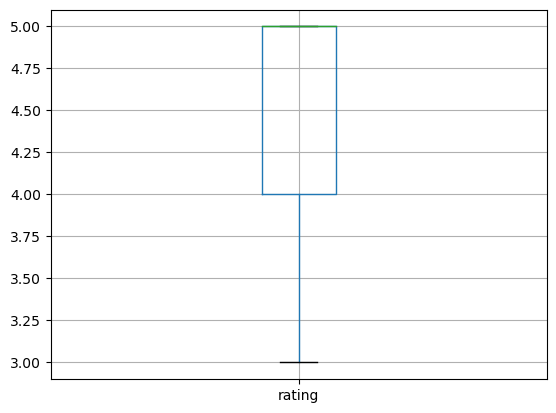

In [137]:
# Add a box plot separately since the value on the axis are much smaller.
df.boxplot(column="rating")

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'food_preparation_time'}>,
        <Axes: title={'center': 'delivery_time'}>]], dtype=object)

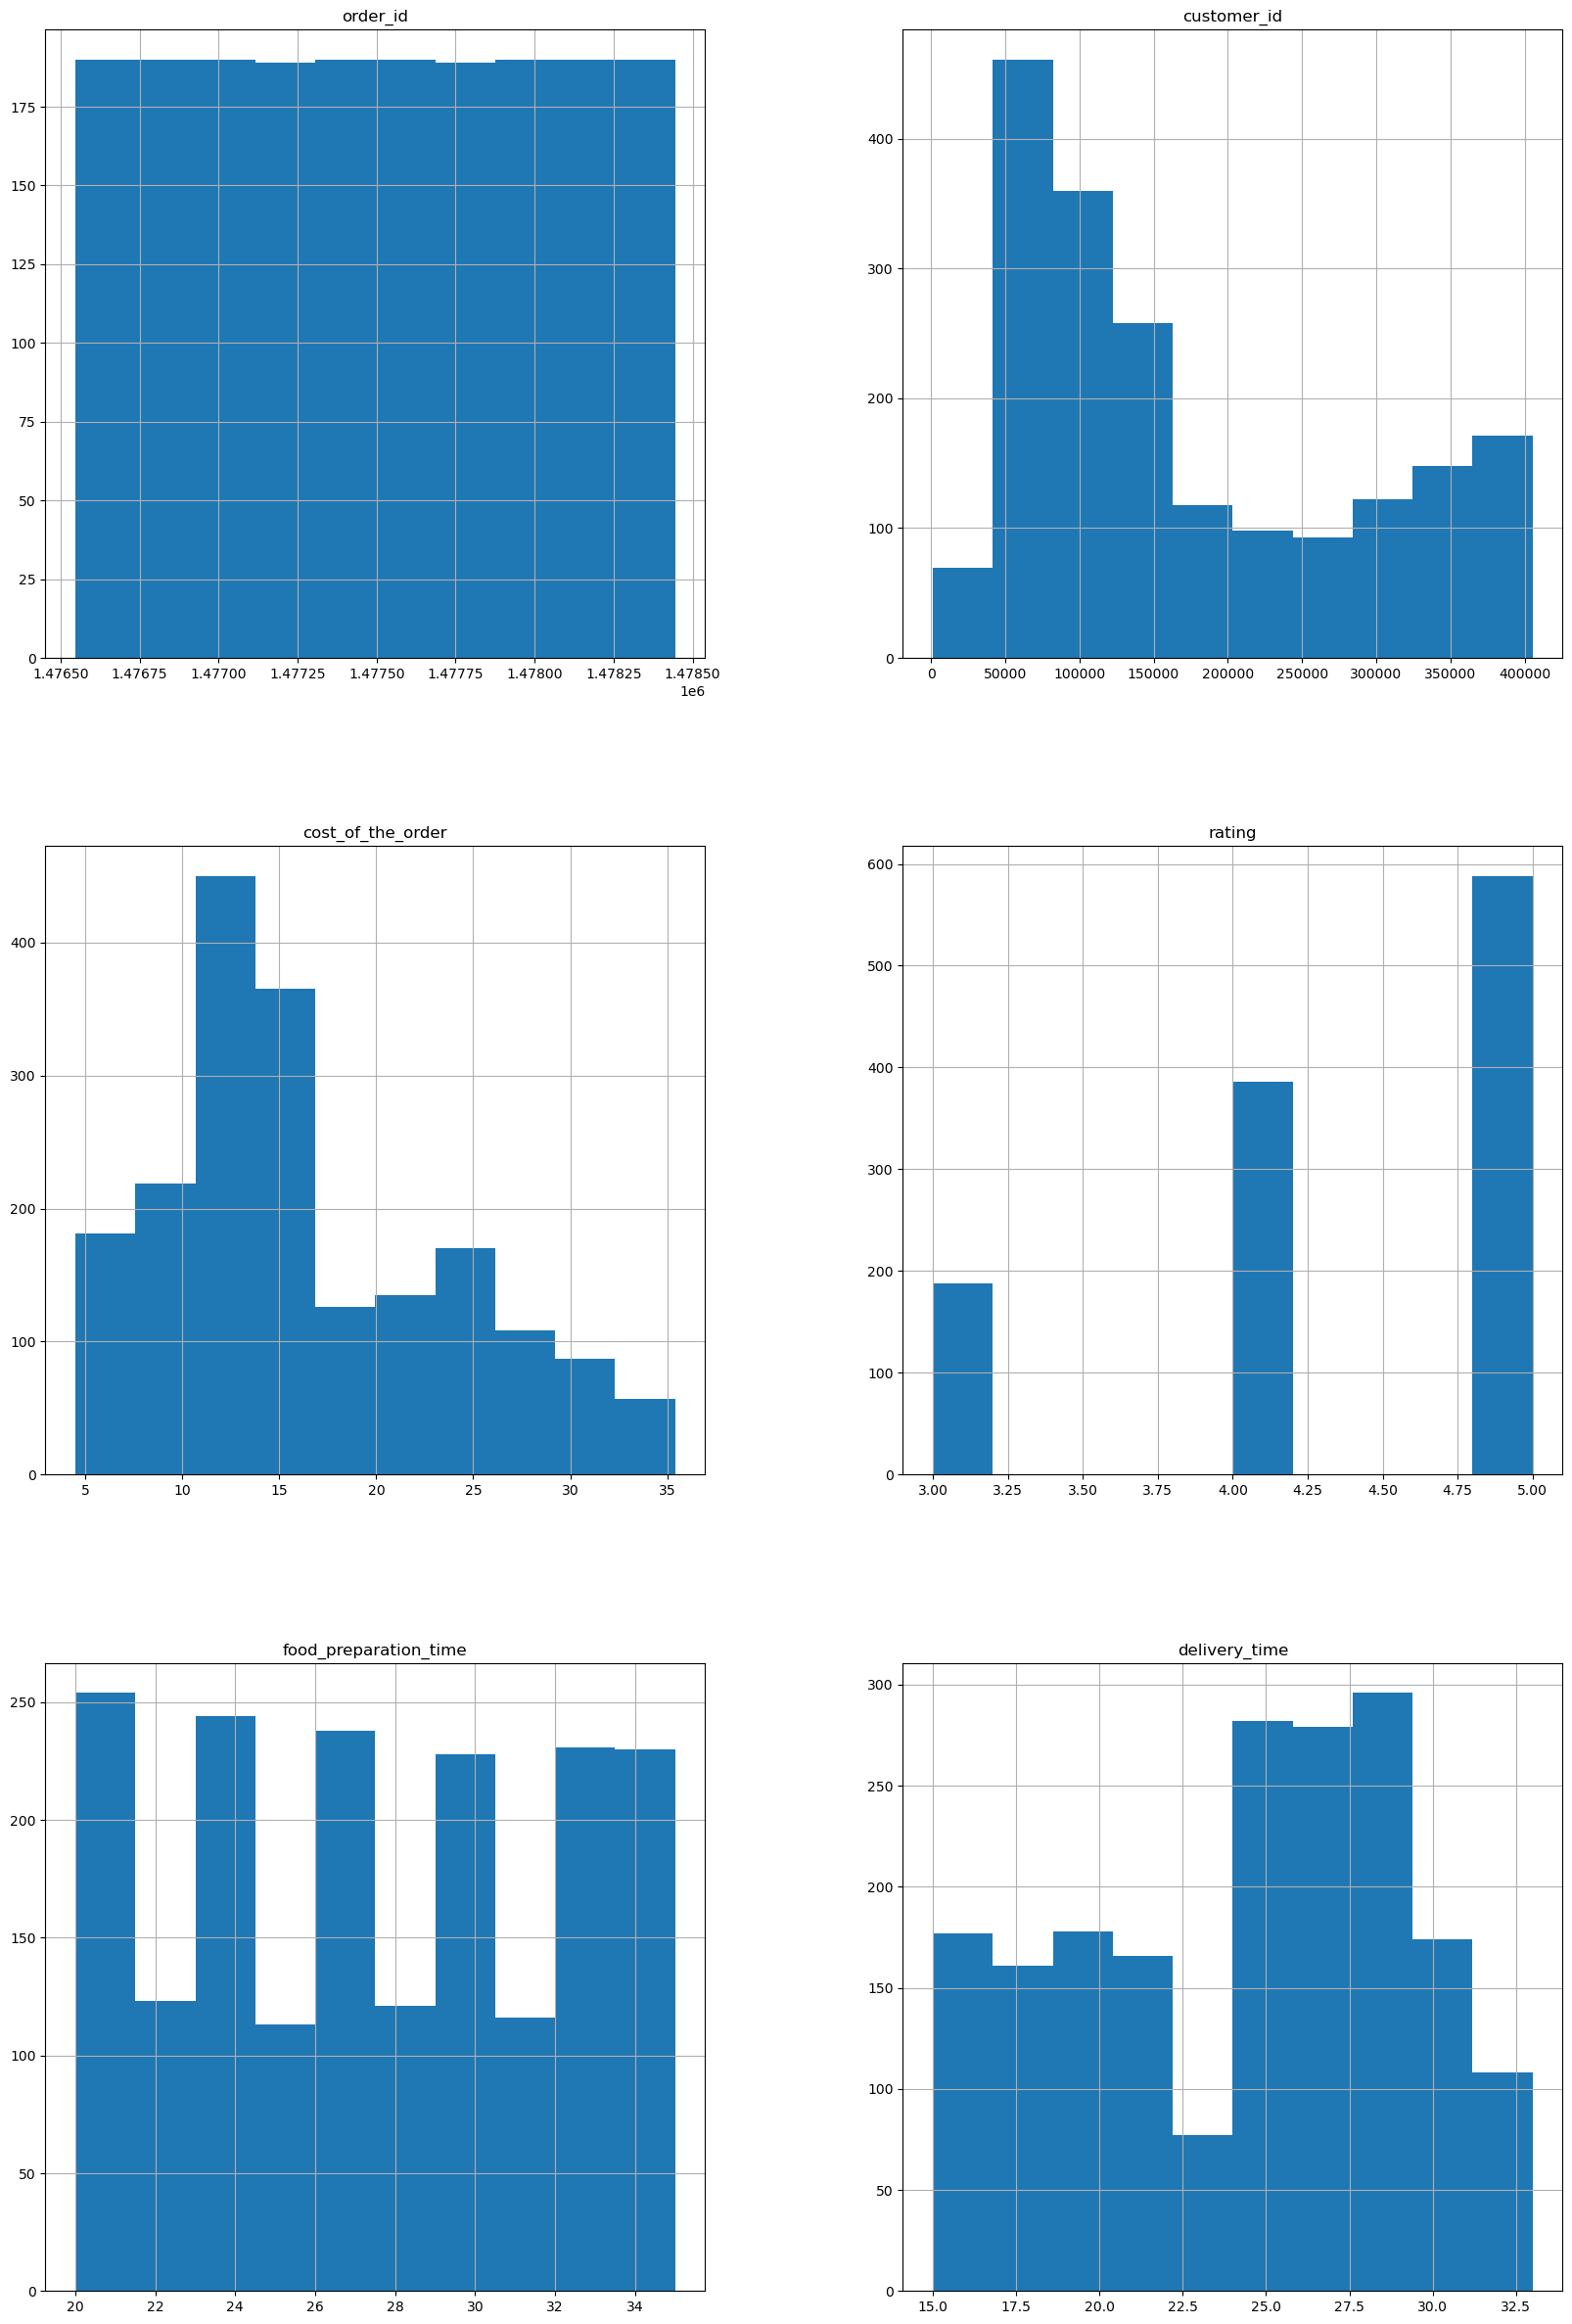

In [134]:
%matplotlib inline

df.hist(figsize=(20,30))

<Axes: xlabel='day_of_the_week', ylabel='count'>

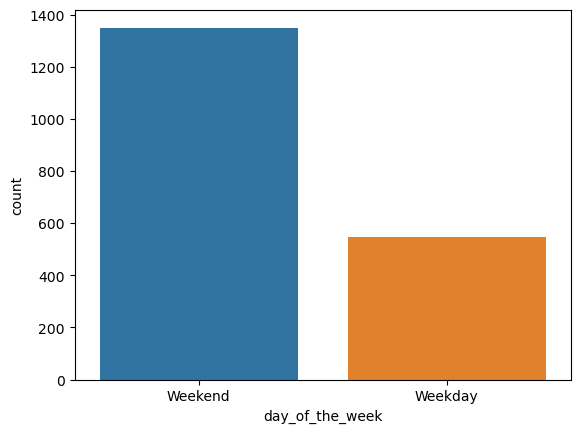

In [206]:
sns.countplot(data=df,x='day_of_the_week')

<Axes: xlabel='cuisine_type', ylabel='count'>

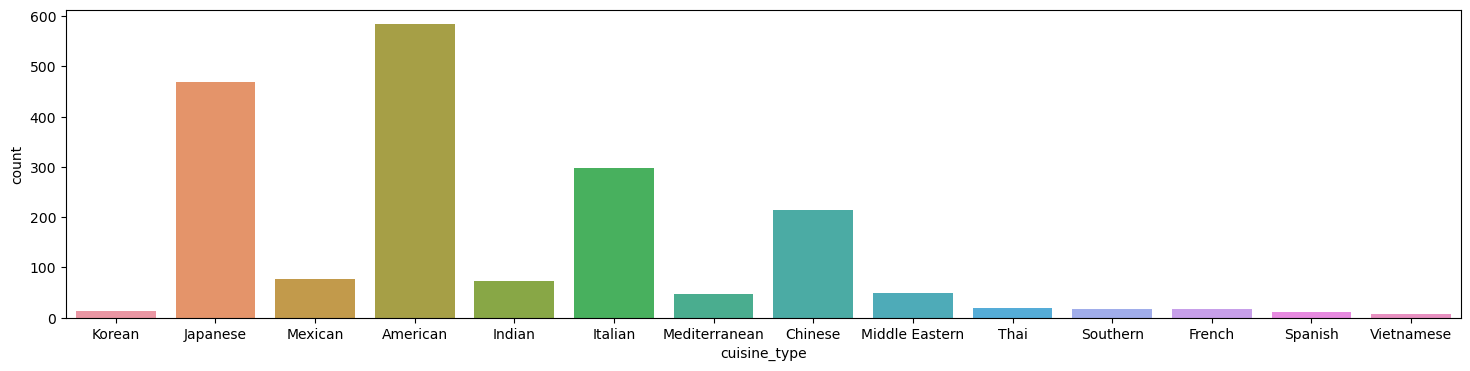

In [211]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df,x='cuisine_type')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
#Counting the orders by restuarant and sorting by most orders.
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64

#### Observations: The top five restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [181]:
# Make a summary table of Cuisine choice by day of the week and sort by weekend starting with most popular.
pd.crosstab(df['day_of_the_week'],df['cuisine_type']).T.sort_values(by='Weekend', ascending=False)

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Japanese,135,335
Italian,91,207
Chinese,52,163
Mexican,24,53
Indian,24,49
Mediterranean,14,32
Middle Eastern,17,32
Thai,4,15


#### Observations:  The most popular cuisine on the weekends is American, followed by Japanese.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [205]:
#Sum the number of order is the cost column over $20 and save it to variable.
orders_over_20=(df.cost_of_the_order>20).sum()
#Count the total orders and save it to a variable.
total_orders=df.cost_of_the_order.count()
#Calulate the percent and then print out the results.
Per_20=100*orders_over_20/total_orders
print('There were',total_orders, 'total orders')
print(orders_over_20,'of them were over $20', ', or',round(Per_20,1),'%')

There were 1898 total orders
555 of them were over $20 , or 29.2 %


#### Observations:  The orders over $20 were 29.2% of orders.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [182]:
round(df.delivery_time.mean(),1)

24.2

#### Observations:  24.2 min is the mean delivery time.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [192]:
#Group customers by customer id and order id, then sum and sort the values to find which customers order the most.
pd.crosstab(df['order_id'],df['customer_id']).sum().sort_values(ascending=False)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Length: 1200, dtype: int64

#### Observations:  The top three customers had IDs 52832, 47440, and 83287; and they placed 13, 10, and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

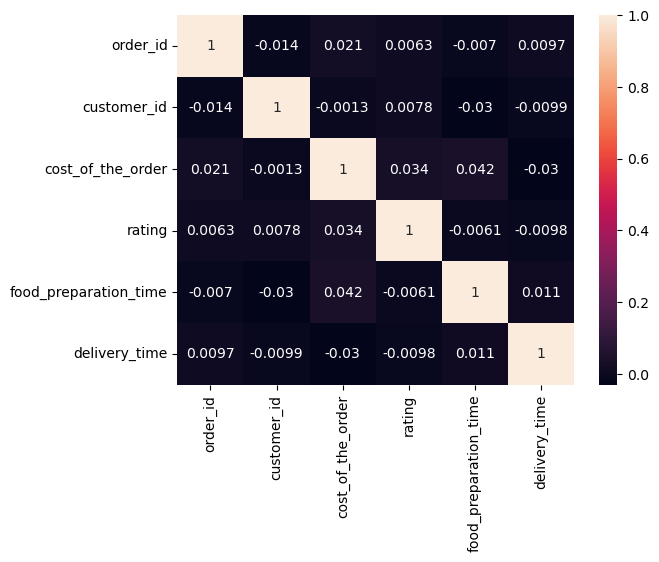

In [214]:
#First make a correlation matrix between the numerical variable.  And then plot it as a heat map.
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True)

There is not correlation between customer rating and delivery time, food preparation time, and cost of the order.  There isn't really any correlation between the numerical variables.

<Axes: xlabel='cuisine_type', ylabel='rating'>

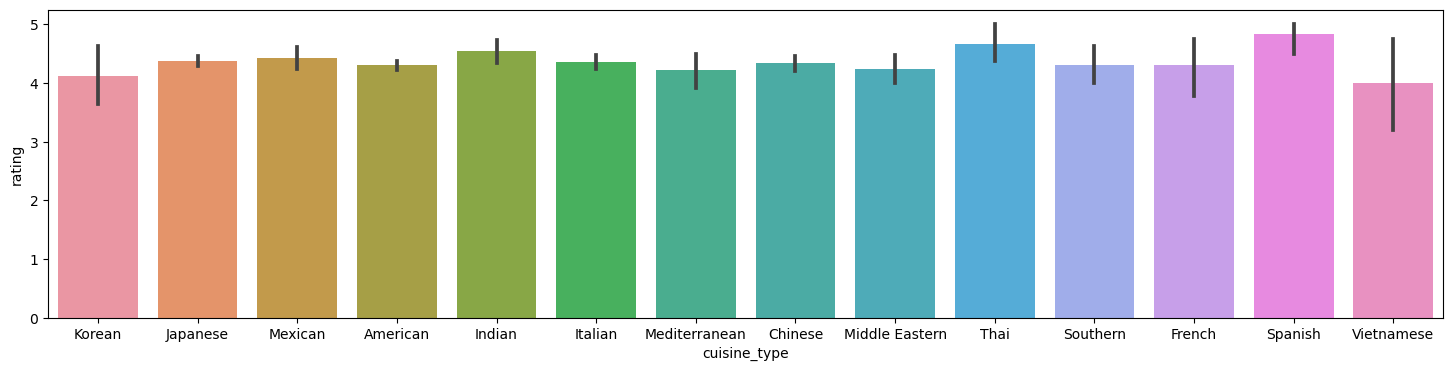

In [224]:
#Display a barplot of customer ratings for each type of cuisine.
plt.figure(figsize=(18, 4))
sns.barplot(x=df.cuisine_type, y=df.rating)

Customer ratings is about equal across the different food cuisine types.  There is not one cuisine that customers think tastes better.

array([[<Axes: title={'center': 'American'}>,
        <Axes: title={'center': 'Chinese'}>,
        <Axes: title={'center': 'French'}>,
        <Axes: title={'center': 'Indian'}>],
       [<Axes: title={'center': 'Italian'}>,
        <Axes: title={'center': 'Japanese'}>,
        <Axes: title={'center': 'Korean'}>,
        <Axes: title={'center': 'Mediterranean'}>],
       [<Axes: title={'center': 'Mexican'}>,
        <Axes: title={'center': 'Middle Eastern'}>,
        <Axes: title={'center': 'Southern'}>,
        <Axes: title={'center': 'Spanish'}>],
       [<Axes: title={'center': 'Thai'}>,
        <Axes: title={'center': 'Vietnamese'}>, <Axes: >, <Axes: >]],
      dtype=object)

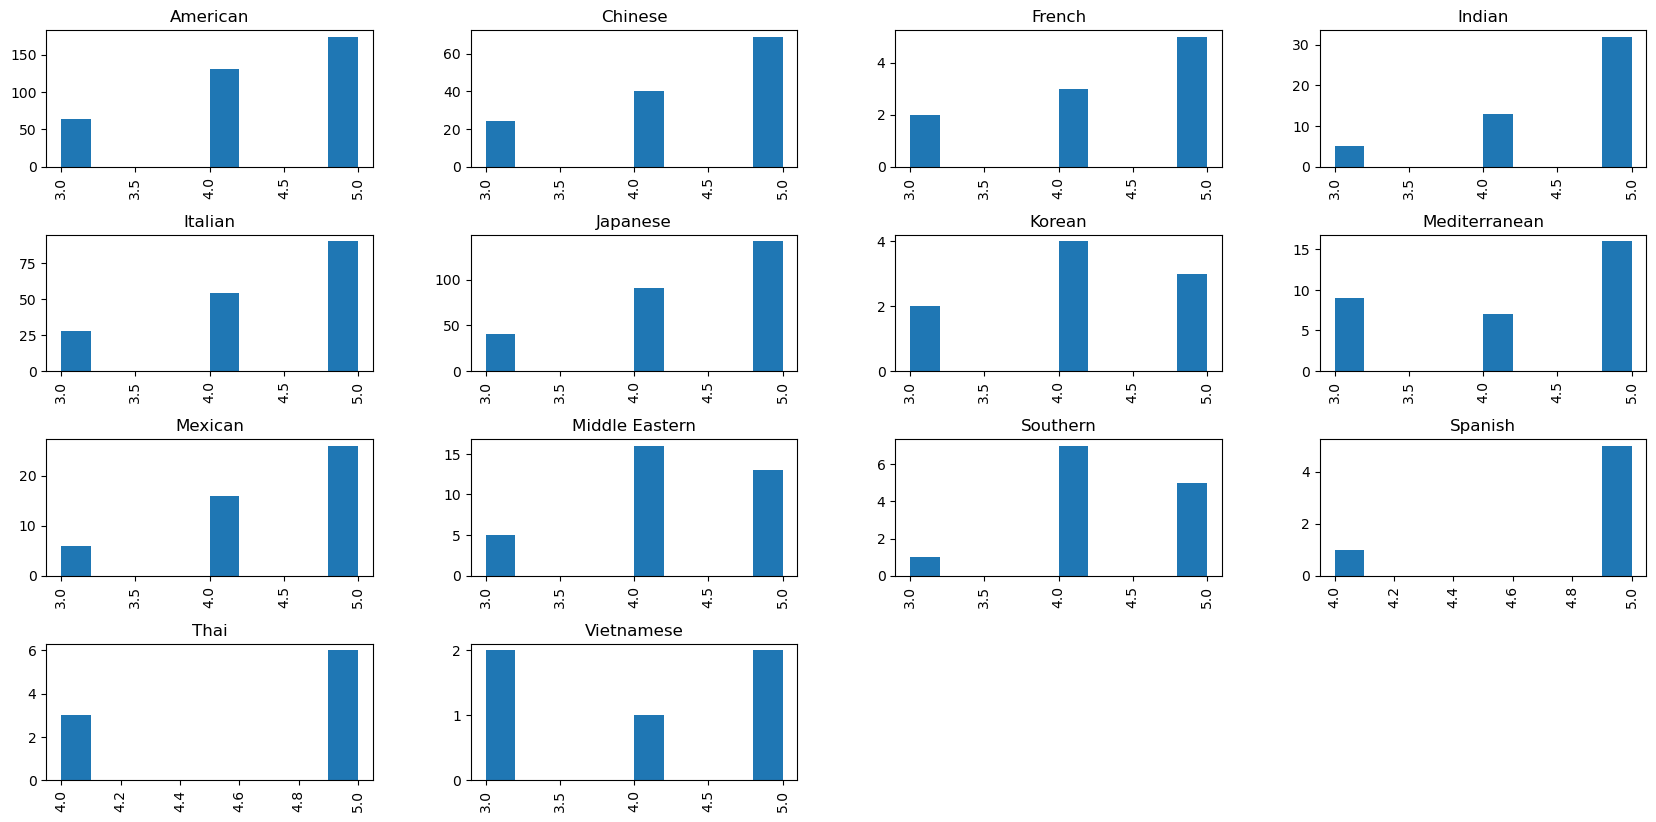

In [221]:
#Plot histograms of customer rating for cuisine type.
df.hist(by='cuisine_type',column = 'rating',figsize=(20,10))

The distribution of ratings is similar among the different cuisine types.  For most cuisines the mean rating is around 4 and the mode is 5.

array([<Axes: title={'center': 'Weekday'}>,
       <Axes: title={'center': 'Weekend'}>], dtype=object)

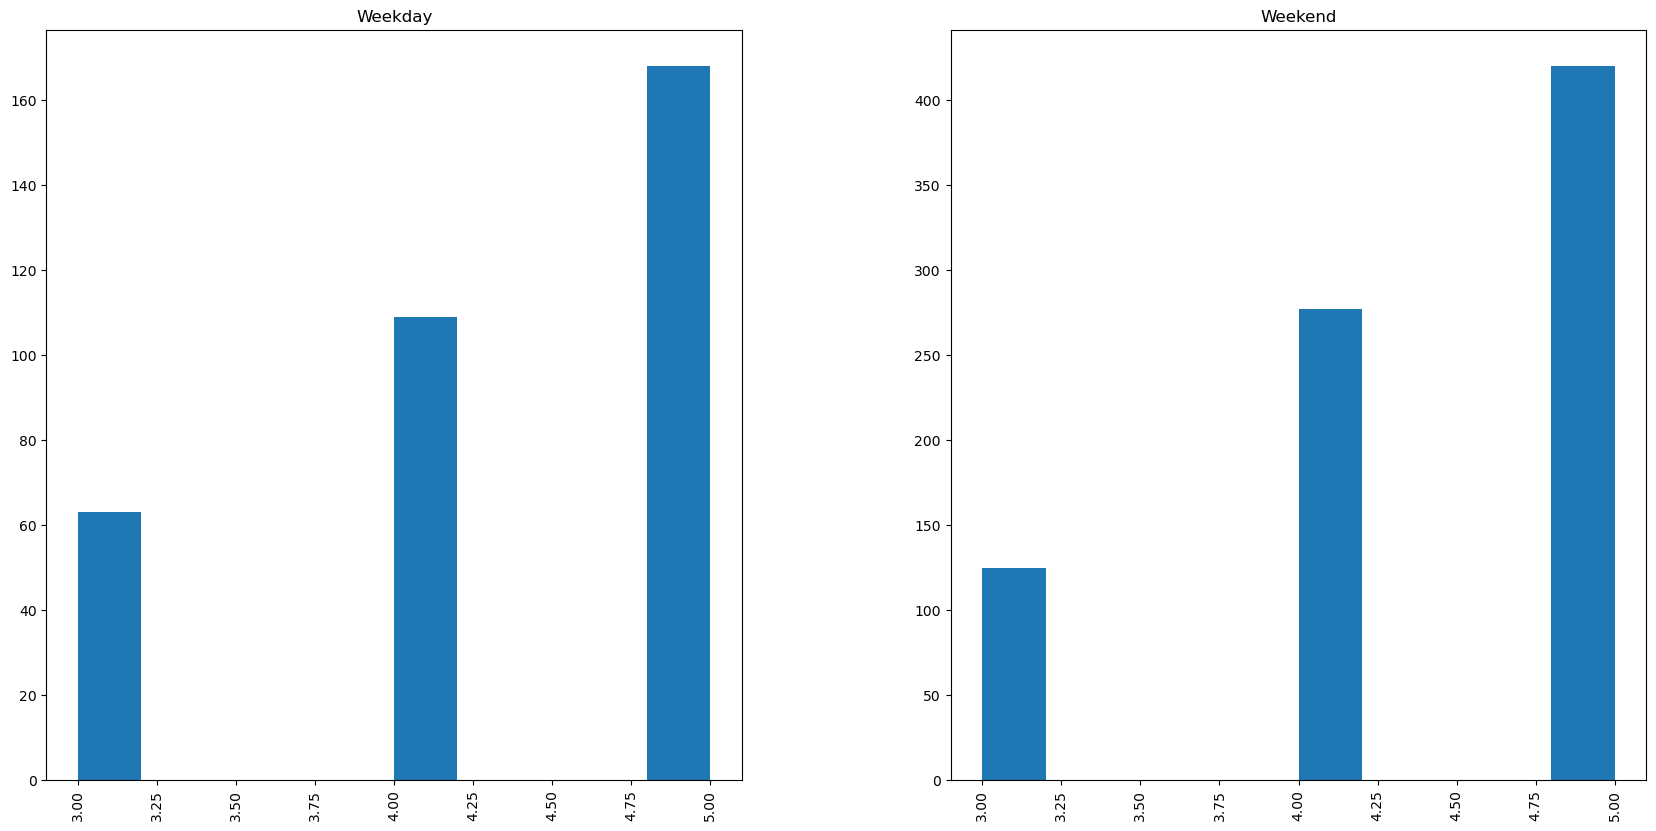

In [225]:
#Plot a histogram of rating by day of the week.
df.hist(by='day_of_the_week',column = 'rating',figsize=(20,10))

The distribution of customer ratings is similar for weedays verses weekends.

<Axes: xlabel='day_of_the_week', ylabel='rating'>

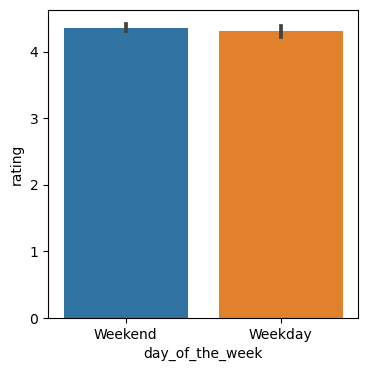

In [227]:
#Display a barplot of customer rating for a weekday verses on the weekend.
plt.figure(figsize=(4, 4))
sns.barplot(x=df.day_of_the_week, y=df.rating)

The customer rating of a food order is not significantly different on the weekend compared to a weekday.

<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

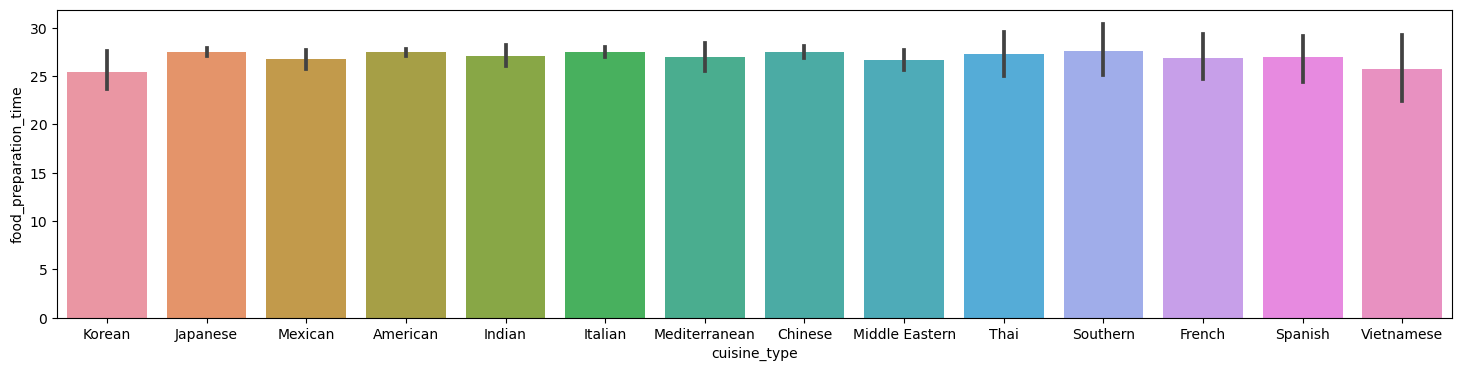

In [228]:
#Compare the time it takes to prepare each cuisine type to see if one has a longer preparation time.
#Plot the food preparation time of each cuisine as a barplot.
plt.figure(figsize=(18, 4))
sns.barplot(x=df.cuisine_type, y=df.food_preparation_time)

All cuisine types take roughly equivalent times to prepare.  It is a uniform distribution.

In [297]:
#Determine if the restaurants that recieve the highest ratings fulfill more orders.
#The heat map compared order id to rating, which wouldn't be meaningful.  
#Here we want to compare the number of order ids by rating of the restaurant.
#Find the top rated restaurants.
top_rated_rest=df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
#Find the restaurants with the most orders
top_attended=df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)
#Combine into a single table sorted by the most orders.
new_df=top_rated_rest.to_frame()
new_df=pd.merge(new_df,top_attended,right_index=True,left_index=True)
new_df=new_df.sort_values(by=['order_id'], ascending=False)
#Shorten the table to only the top 12 restaurants.
short_new_df=new_df.iloc[0:12,:]
short_new_df

,rating,order_id
restaurant_name,,
Shake Shack,4.278195,219
The Meatball Shop,4.511905,132
Blue Ribbon Sushi,4.219178,119
Blue Ribbon Fried Chicken,4.328125,96
Parm,4.128205,68
RedFarm Broadway,4.243902,59
RedFarm Hudson,4.176471,55
TAO,4.357143,49
Han Dynasty,4.434783,46


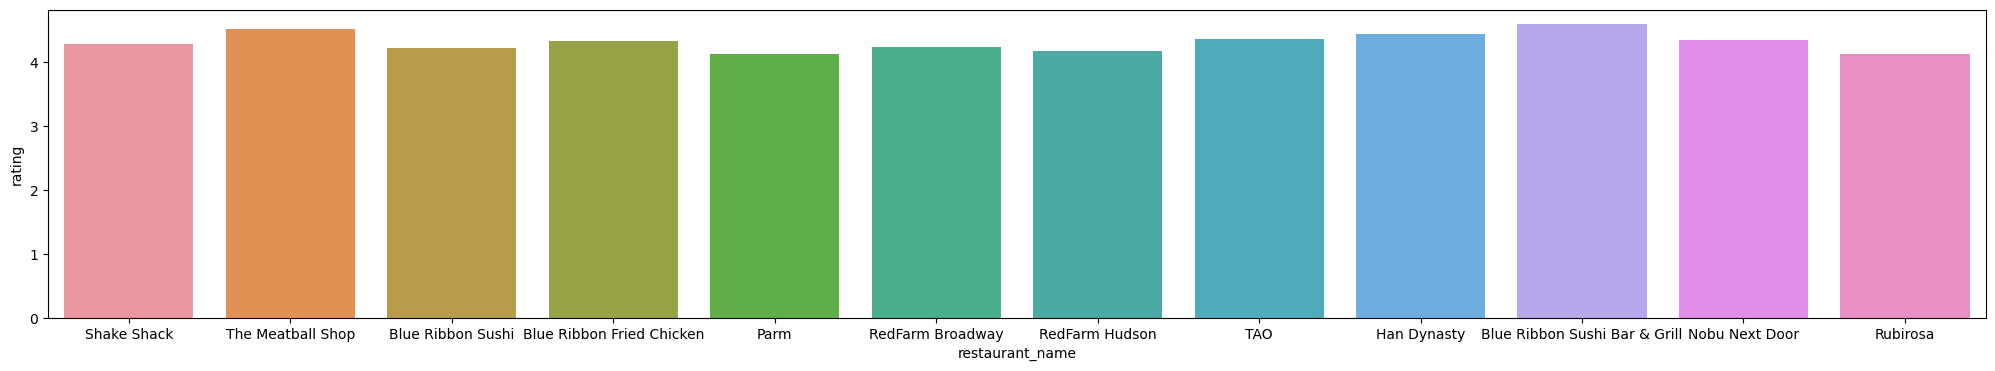

<Axes: xlabel='restaurant_name', ylabel='order_id'>

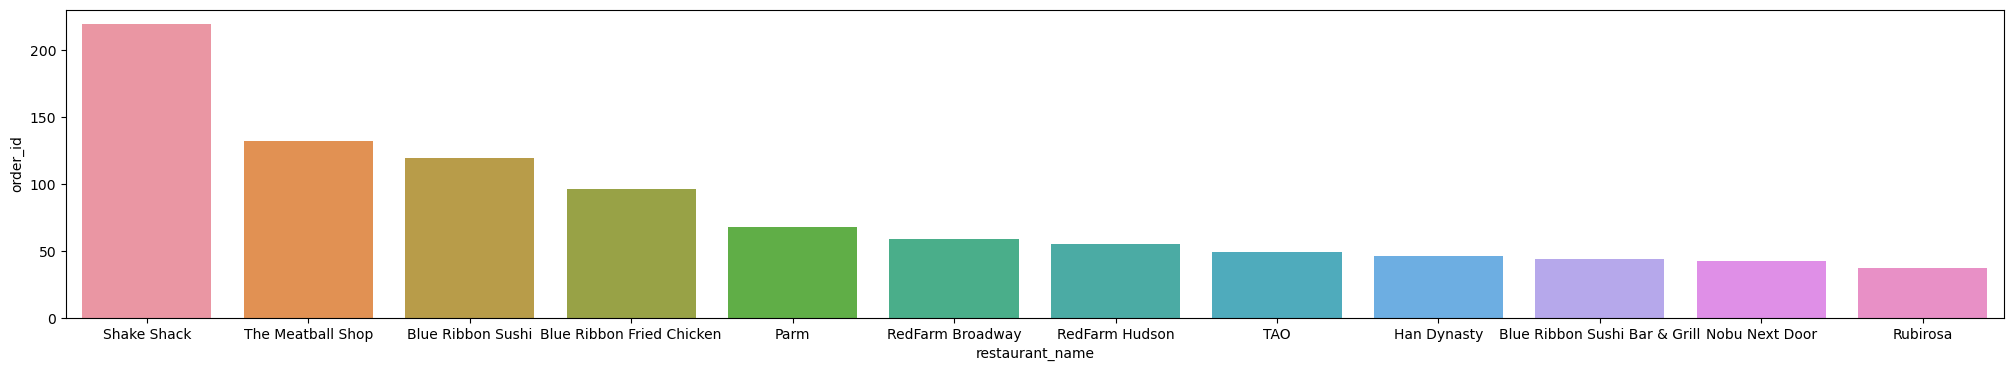

In [473]:
#Plot the rating of each restaurant in a barplot
plt.figure(figsize=(25, 4))
sns.barplot(x=short_new_df.index, y=short_new_df.rating)
plt.show()
#Plot the number of orders of the restaurants in the same order and color for comparison of number of orders and rating.
plt.figure(figsize=(25, 4))
sns.barplot(x=short_new_df.index, y=short_new_df.order_id)

The rating a restaurant gets does not necessarily correlate with the number of orders that will be placed.  Some restaurants that have high ratings did not recieve high orders for example Blue Ribbon Sushi Bar and Grill has the highest average rating of 4.6 but recieved less orders than other restaurants.  It is also observed that Blue Ribbon Sushi and Blue Ribbon Sushi Bar and Grill are both listed and are likely describing the same restaurant.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [407]:
#Filter restaurants that have a mean rating >4.
well_rated=df.groupby('restaurant_name')['rating'].mean()>4
#Filter restaurants that have a more than 50 ratings.
freq_rated=df.groupby('restaurant_name')['rating'].count()>50
#Merge both filters into a single table, and rename the columns to the filter name.
promo_df=pd.merge(well_rated,freq_rated,right_index=True,left_index=True)
promo_df.rename(columns={'rating_x':'well_rated','rating_y':'freq_rated'})
#Apply the freq_rated filter to the table since it is the more stringent of the two filters.
promo_df[freq_rated]
#The remaining rows satisfy each criteria

,rating_x,rating_y
restaurant_name,,
Blue Ribbon Fried Chicken,True,True
Blue Ribbon Sushi,True,True
Shake Shack,True,True
The Meatball Shop,True,True


#### Observations:  Four restaurants meet the criterial and they are: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop	.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [421]:
#Find all the orders that cost more than $20.
cost_20=df.loc[(df.cost_of_the_order>20),"cost_of_the_order"]
#Add up the column of orders that cost more than $20 and multply by 25% to get the revenue on orders over $20
#Save to a variable named rev_20
rev_20=cost_20.sum()*0.25

In [452]:
#Find all the orders that cost less than or equal to $20.
cost_5=df.loc[(df.cost_of_the_order<=20),"cost_of_the_order"]
#Of those orders find the ones more than $5.
#Add that column of orders and multiply by 15% to get the revenue on orders between 5 and 20.
#Save to a variable named rev_5.
rev_5=cost_5.loc[cost_5>5].sum()*0.15
#Add the two sources of revenues together by their variable names.
rev_20+rev_5

6166.303

#### Observations:  The company made $6166.30 in revenue from orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [463]:
#First add together the food preparation time and delivery time columns and save to a new array
total_time=df.food_preparation_time+df.delivery_time
#Filter the array for values that take more than 60 mintutes total and then count those number of orders. Save to variable.
long_wait=total_time.loc[total_time>60].count()
#Find the percent of orders>60 min by dividing the count of orders>60 min by total orders and multiple by 100.
round(long_wait/total_orders*100,1)

10.5

#### Observations:  The orders that take greater than 60 min to fulfill are 10.5% of orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [467]:
df.groupby('day_of_the_week')['delivery_time'].mean().to_frame()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: The delivery time is longer on a weekday at a mean of 28 min compared to 22 min on the weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American, Japanese, and Italian cuisines are the most popular in terms of number of orders.
*  The customer rating of a restaurant doesn't necessarily correlate with the volume of orders it recieves.
*  The customer rating is independant of delivery time, and food preparation time.
*  The differnet styles of cuisine recieve similar customer ratings and have similar preparation times.

### Recommendations:

*  Some restaurants that are highly rated don't recieve a large volume of orders, I would increase advertising on the app for those restaurants.
*  On the weekends I would advertise restaurants that are highly rated and have American, Japanese, or Italian cuisine, the most popular cuisines.
*  There are a lot less orders placed on weekdays, increase advertising during the week to boost the number of orders.
*  I would continue the promotional offer for restaurants that have a high rating, and high traffic (Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop ).

---